In [83]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LinearRegression
import seaborn as sb 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as mtp 
import plotly.express as px
import statsmodels.api as s
from sklearn import metrics
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('obesity_data.csv')

In [3]:
data.head(5)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
print(data.info)

<bound method DataFrame.info of      Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0     56    Male  173.575262  71.982051  23.891783                      4   
1     69    Male  164.127306  89.959256  33.395209                      2   
2     46  Female  168.072202  72.930629  25.817737                      4   
3     32    Male  168.459633  84.886912  29.912247                      3   
4     60    Male  183.568568  69.038945  20.487903                      3   
..   ...     ...         ...        ...        ...                    ...   
995   18    Male  155.588674  64.103182  26.480345                      4   
996   35  Female  165.076490  97.639771  35.830783                      1   
997   49  Female  156.570956  78.804284  32.146036                      1   
998   64    Male  164.192222  57.978115  21.505965                      4   
999   66  Female  178.537130  74.962164  23.517168                      1   

    ObesityCategory  
0     Normal weight  

In [5]:
print(data.describe)

<bound method NDFrame.describe of      Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0     56    Male  173.575262  71.982051  23.891783                      4   
1     69    Male  164.127306  89.959256  33.395209                      2   
2     46  Female  168.072202  72.930629  25.817737                      4   
3     32    Male  168.459633  84.886912  29.912247                      3   
4     60    Male  183.568568  69.038945  20.487903                      3   
..   ...     ...         ...        ...        ...                    ...   
995   18    Male  155.588674  64.103182  26.480345                      4   
996   35  Female  165.076490  97.639771  35.830783                      1   
997   49  Female  156.570956  78.804284  32.146036                      1   
998   64    Male  164.192222  57.978115  21.505965                      4   
999   66  Female  178.537130  74.962164  23.517168                      1   

    ObesityCategory  
0     Normal weight

In [6]:
data.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [7]:
numeric_colums = data.select_dtypes(
    include="number"
).columns
numeric_colums

Index(['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel'], dtype='object')

In [8]:
X = data.iloc[:,[0,2,3]]
X

,Age,Height,Weight
0,56,173.575262,71.982051
1,69,164.127306,89.959256
2,46,168.072202,72.930629
3,32,168.459633,84.886912
4,60,183.568568,69.038945
...,...,...,...
995,18,155.588674,64.103182
996,35,165.076490,97.639771
997,49,156.570956,78.804284
998,64,164.192222,57.978115


In [9]:
y = data['BMI']

In [10]:
x_train,x_test,y_train,y_test = tts(X,y,test_size = 0.2 , random_state = 45)

In [11]:
lr = LinearRegression()

In [55]:
mlr = lr.fit(x_train,y_train)

In [13]:
y_pred = lr.predict(x_test)

In [14]:
y_pred

array([33.09058513, 21.97510904, 24.46511883, 34.12528657, 31.21908301,
       30.18596955, 18.33520159, 17.2803588 , 22.87235532, 21.56485541,
       33.95583555, 12.85215978, 14.3231665 , 25.7419016 , 26.13419075,
       17.44903352, 24.58415849, 29.14645149, 16.88245193, 23.04374463,
       18.91109042, 22.54925488, 22.49271136, 32.11568509, 18.4216217 ,
       36.30078316, 23.47196533, 32.72672007, 23.22740749, 21.34140311,
       20.42619843, 30.53319014, 23.33794888, 20.84456546, 25.90503255,
       20.98656471, 25.12017976, 30.36801401, 21.18902522, 35.70723245,
       35.01224223, 18.71109673, 26.08787761, 30.27462805,  8.38784616,
       17.89831704, 26.60235316, 36.50952716, 21.9344068 , 23.52629706,
       24.1220573 , 28.14934163, 26.73895051, 18.69301094, 17.09815715,
       27.03915928, 20.43602144, 28.98048303, 26.25305358,  9.89042694,
       23.49415105, 25.14064719, 27.92322677, 22.87717064, 26.10130614,
       33.04488559, 33.64593049, 20.77557158, 22.14078821, 17.80

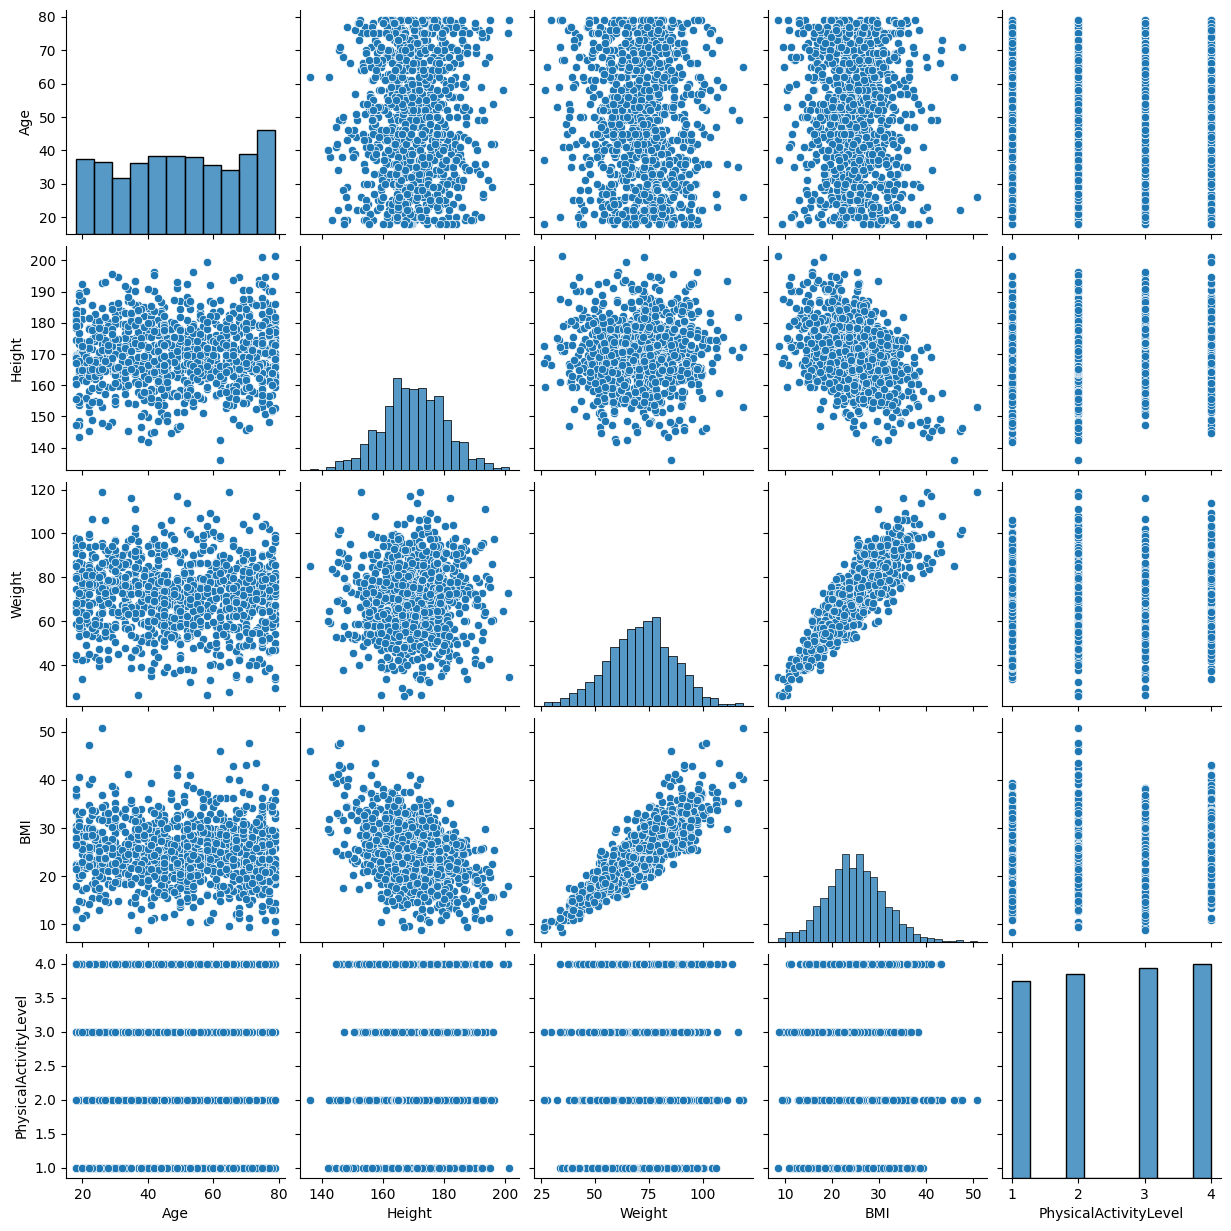

In [15]:
sb.pairplot(data)

In [77]:
print(lr.coef_)
print(lr.intercept_)

beta0 = lr.intercept_
beta1, beta2, beta3 = lr.coef_


# Create meshgrid for Height and Weight on BMI
xx, yy = np.meshgrid(data['Height'], data['Weight'])
zz = beta0 + beta2 * xx + beta3 * yy

# Create meshgrid for Height and Age on BMI
xx1, yy1 = np.meshgrid(data['Height'], data['Age'])
zz1 = beta0 + beta3 * xx1 + beta1 * yy1

# Create meshgrid for Weight and Age on BMI
xx2, yy2 = np.meshgrid(data['Weight'], data['Age'])
zz2 = beta0 + beta3 * xx2 + beta1 * yy2

[-0.00090478 -0.29261869  0.34554519]
50.0910394809022


Text(0.5, 0, 'BMI')

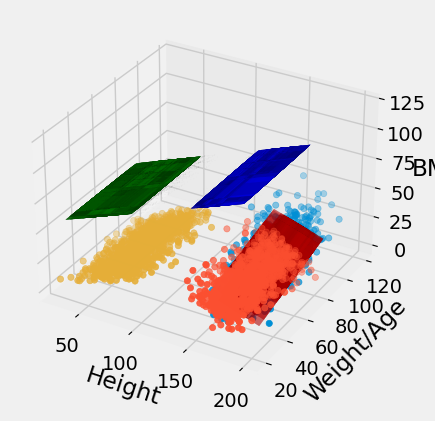

In [79]:
fig = mtp.figure()
# mtp.style.use('fivethirtyeight')  
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Height'], data['Weight'], data['BMI'], label='Height & Weight on BMI')
ax.scatter(data['Height'], data['Age'], data['BMI'], label='Height & Age on BMI')
ax.scatter(data['Weight'], data['Age'], data['BMI'], label='Weight & Age on BMI')

# Plot the regression planes
ax.plot_surface(xx, yy, zz, alpha=0.1, color='red', label='Height & Weight & Age Regression Plane')
ax.plot_surface(xx1, yy1, zz1, alpha=0.5, color='blue', label='Height & Age Regression Plane')
ax.plot_surface(xx2, yy2, zz2, alpha=0.5, color='green', label='Weight & Age Regression Plane')

ax.set_xlabel('Height')
ax.set_ylabel('Weight/Age')
ax.set_zlabel('BMI')



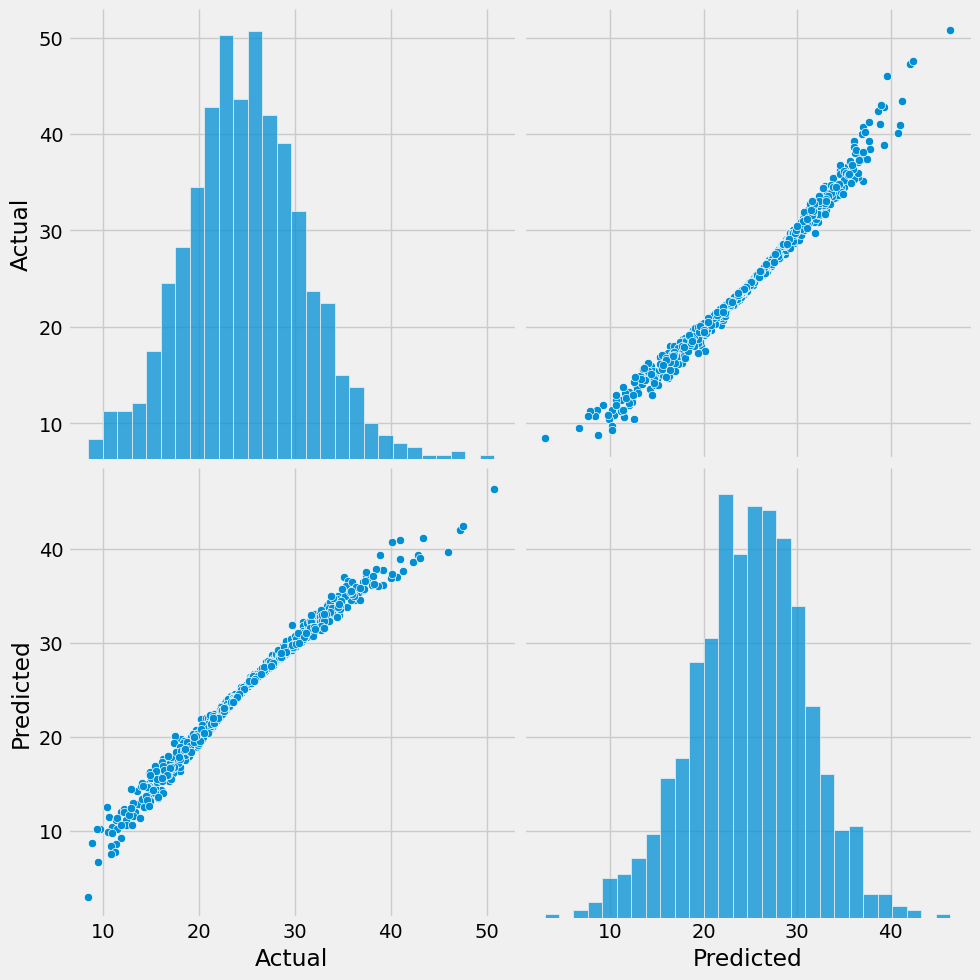

In [34]:
df_regression = pd.DataFrame({'Actual': y, 'Predicted': lr.predict(X)})
sb.pairplot(df_regression, height=5)

In [37]:
print(lr.coef_)
print(lr.intercept_)

[-0.00090478 -0.29261869  0.34554519]
50.0910394809022


In [38]:
list(zip(['Age','Height','Weight'] , lr.coef_))

[('Age', -0.0009047810154784325),
 ('Height', -0.29261869105021443),
 ('Weight', 0.3455451930667684)]

<Axes: >

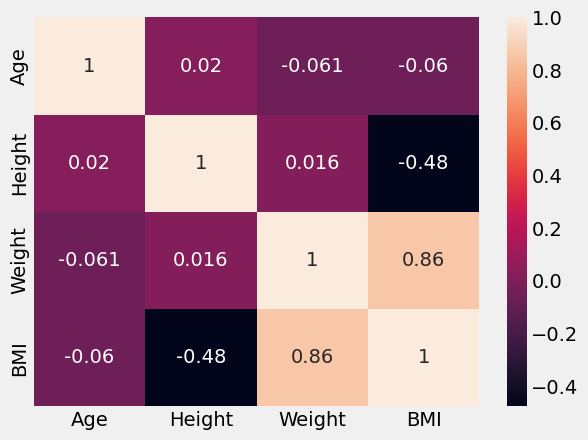

In [43]:
sb.heatmap(data[['Age','Height','Weight','BMI']].corr() , annot=True)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test, y_pred) ))

Mean Absolute Error: 0.5074682728272449
Mean Squared Error: 0.7044767104349633
Root Mean Squared Error: 0.8393311089403057


In [82]:
x_min, x_max = data['Height'].min(), data['Height'].max()
y_min, y_max = data['Weight'].min(), data['Weight'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Calculate predicted values
zz = beta0 + beta1 * xx + beta2 * yy

fig = go.Figure()

# Scatter plot
fig.add_trace(go.Scatter3d(x=data['Height'], y=data['Weight'], z=data['BMI'], mode='markers', marker=dict(size=5)))

# Surface plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, colorscale='Viridis'))

# Layout settings
fig.update_layout(scene=dict(xaxis_title='Height', yaxis_title='Weight', zaxis_title='BMI'))


In [84]:
colors = ['Positive' if c > 0 else 'Negative' for c in lr.coef_]

fig = px.bar(
    x=X.columns, y=lr.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting petal width'
)
fig.show()

In [88]:
fig = px.scatter(x=data['BMI'], y=lr.predict(X), labels={'x': 'Actual OBS', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()